In [0]:
#a
data = spark.read.option("header","true").csv("/FileStore/tables/Retail/").cache()


In [0]:
dataSchema = data.schema
data.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   580538|    23084|  RABBIT NIGHT LIGHT|      48|2011-12-05 08:38:00|     1.79|   14075.0|United Kingdom|
|   580538|    23077| DOUGHNUT LIP GLOSS |      20|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|
|   580538|    22906|12 MESSAGE CARDS ...|      24|2011-12-05 08:38:00|     1.65|   14075.0|United Kingdom|
|   580538|    21914|BLUE HARMONICA IN...|      24|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|
|   580538|    22467|   GUMBALL COAT RACK|       6|2011-12-05 08:38:00|     2.55|   14075.0|United Kingdom|
|   580538|    21544|SKULLS  WATER TRA...|      48|2011-12-05 08:38:00|     0.85|   14075.0|United Kingdom|
|   580538|    23126|FELTCRA

In [0]:
data.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
#b
# Number of rows
num_rows = data.count()

# Number of distinct InvoiceNo
num_distinct_invoice = data.select("InvoiceNo").distinct().count()

print("Number of rows:", num_rows)
print("Number of distinct InvoiceNo:", num_distinct_invoice)


Number of rows: 541909
Number of distinct InvoiceNo: 25900


In [0]:
# number of transactions
data.createOrReplaceTempView("Retail")
q="SELECT SUM (Quantity) as TotalTransactions FROM Retail;"
sqlDF = spark.sql(q)
sqlDF.show()

+-----------------+
|TotalTransactions|
+-----------------+
|        5176450.0|
+-----------------+



In [0]:
# Total value of transactions as DataFrame
total_value_df = data.withColumn("TotalValue", (col("Quantity") * col("UnitPrice"))).groupBy().agg(sum("TotalValue").alias("TotalValue"))
total_value_df.show()


+-----------------+
|       TotalValue|
+-----------------+
|9747747.933999462|
+-----------------+



In [0]:
# c 
data.createOrReplaceTempView("Retail")
q="SELECT StockCode, SUM (Quantity) as TotalQuantity FROM Retail GROUP BY StockCode ORDER BY TotalQuantity DESC LIMIT 5;"
sqlDF = spark.sql(q)
sqlDF.show()
     

+---------+-------------+
|StockCode|TotalQuantity|
+---------+-------------+
|    22197|      56450.0|
|    84077|      53847.0|
|   85099B|      47363.0|
|   85123A|      38830.0|
|    84879|      36221.0|
+---------+-------------+



In [0]:
# d
data.createOrReplaceTempView("Retail")

query = """
    SELECT StockCode, SUM (Quantity*UnitPrice) AS TotalPrice
    FROM Retail 
    GROUP BY StockCode 
    ORDER BY TotalPrice DESC 
    LIMIT 5
"""

sqlDF = spark.sql(query)

sqlDF.show()


+---------+-----------------+
|StockCode|       TotalPrice|
+---------+-----------------+
|      DOT|        206245.48|
|    22423|        164762.19|
|    47566|         98302.98|
|   85123A|          97894.5|
|   85099B|92356.02999999994|
+---------+-----------------+



In [0]:
# e
data.createOrReplaceTempView("Retail")

query = """
    SELECT Country, SUM (Quantity*UnitPrice) AS TotalValue
    FROM Retail 
    GROUP BY Country
"""
sqlDF = spark.sql(query)
sqlDF.show()



+---------------+------------------+
|        Country|        TotalValue|
+---------------+------------------+
|         Sweden|          36595.91|
|        Germany|         221698.21|
|         France|          197403.9|
|         Greece|           4710.52|
|        Belgium|          40910.96|
|        Finland|          22326.74|
|          Malta|2505.4700000000003|
|    Unspecified|           4749.79|
|          Italy|          16890.51|
|           EIRE|263276.82000000024|
|         Norway| 35163.45999999999|
|          Spain| 54774.57999999999|
|        Denmark|18768.139999999996|
|      Hong Kong|          10117.04|
|        Iceland|            4310.0|
|Channel Islands|20086.290000000005|
|            USA|1730.9199999999992|
|    Switzerland| 56385.34999999997|
|          Japan|35340.619999999995|
|         Poland|           7213.14|
+---------------+------------------+
only showing top 20 rows



In [0]:
data.createOrReplaceTempView("Retail")
query = """
    SELECT Country, SUM (Quantity*UnitPrice) AS TotalValue
    FROM Retail 
    GROUP BY Country
    ORDER BY TotalValue DESC
"""

sqlDF = spark.sql(query)
sqlDF.show()


+---------------+------------------+
|        Country|        TotalValue|
+---------------+------------------+
| United Kingdom|  8187806.36399976|
|    Netherlands| 284661.5399999999|
|           EIRE|263276.82000000024|
|        Germany|         221698.21|
|         France|          197403.9|
|      Australia|137077.26999999996|
|    Switzerland| 56385.34999999997|
|          Spain| 54774.57999999999|
|        Belgium|          40910.96|
|         Sweden|          36595.91|
|          Japan|35340.619999999995|
|         Norway| 35163.45999999999|
|       Portugal|29367.020000000004|
|        Finland|          22326.74|
|Channel Islands|20086.290000000005|
|        Denmark|18768.139999999996|
|          Italy|          16890.51|
|         Cyprus|12946.289999999997|
|        Austria|          10154.32|
|      Hong Kong|          10117.04|
+---------------+------------------+
only showing top 20 rows



In [0]:
# f
data.createOrReplaceTempView("Retail")
query = """
    SELECT StockCode, SUM (Quantity*UnitPrice) AS TotalPrice
    FROM Retail 
    GROUP BY StockCode
    ORDER BY TotalPrice DESC
    LIMIT 5
"""
sqlDF = spark.sql(query)
sqlDF.show()


+---------+-----------------+
|StockCode|       TotalPrice|
+---------+-----------------+
|      DOT|        206245.48|
|    22423|        164762.19|
|    47566|         98302.98|
|   85123A|          97894.5|
|   85099B|92356.02999999994|
+---------+-----------------+



In [0]:
display(sqlDF)


StockCode,TotalPrice
DOT,206245.48
22423,164762.19
47566,98302.98
85123A,97894.5
85099B,92356.02999999994


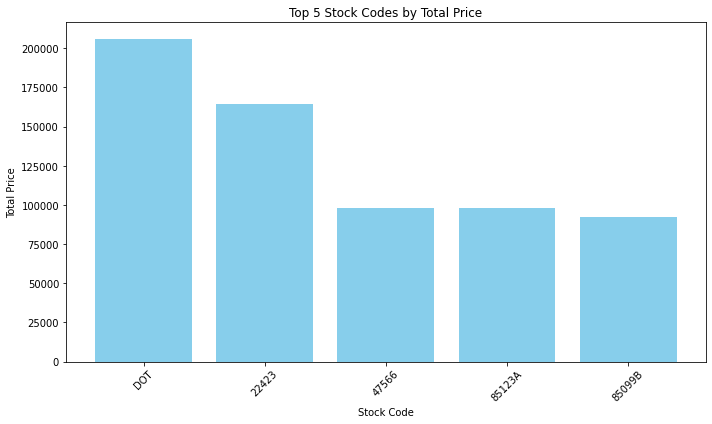

In [0]:
import matplotlib.pyplot as plt

# Data from the SQL result
stockcodes = ['DOT', '22423', '47566', '85123A', '85099B']
total_prices = [206245.48, 164762.19, 98302.98, 97894.5, 92356.02999999994]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(stockcodes, total_prices, color='skyblue')
plt.xlabel('Stock Code')
plt.ylabel('Total Price')
plt.title('Top 5 Stock Codes by Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
